In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

In [2]:
train_data = pd.read_csv("train.csv")
train_data


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
train_data.head()
train_data.tail()
train_data.isnull().sum()
train_data.info()
train_data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].median())
train_data['Embarked'] = train_data['Embarked'].fillna(train_data['Embarked'].mode())
train_data = train_data.drop(columns=['Cabin'])

In [5]:
train_data['Survived'] = train_data['Survived'].astype('category')
train_data['Pclass'] = train_data['Pclass'].astype('category')
train_data['Embarked'] = train_data['Embarked'].astype('category')


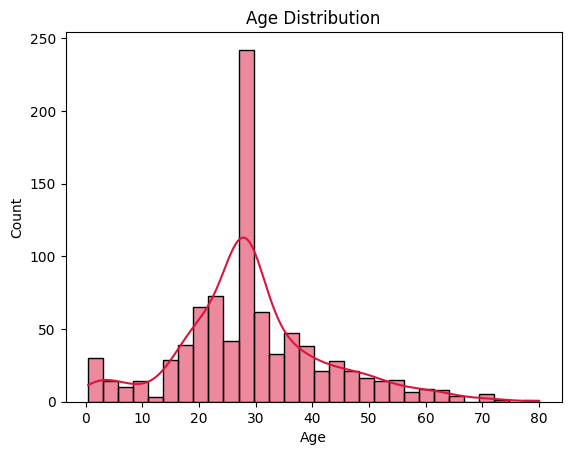

In [6]:
sns.histplot(train_data['Age'], kde=True, bins=30, color='crimson')
plt.title('Age Distribution')
plt.show()


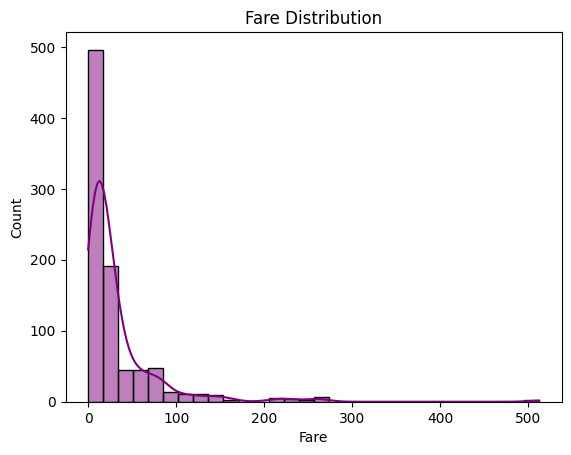

In [7]:
sns.histplot(train_data['Fare'], kde=True, bins=30, color='purple')
plt.title('Fare Distribution')
plt.show()


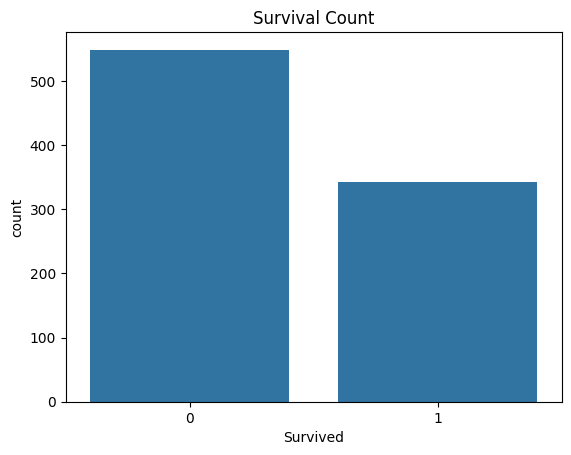

In [8]:
sns.countplot(x='Survived', data=train_data)
plt.title('Survival Count')
plt.show()


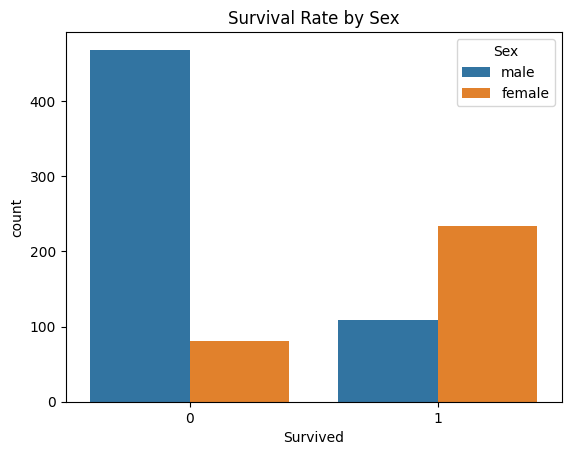

In [9]:
sns.countplot(x='Survived', hue='Sex', data=train_data)
plt.title('Survival Rate by Sex')
plt.show()


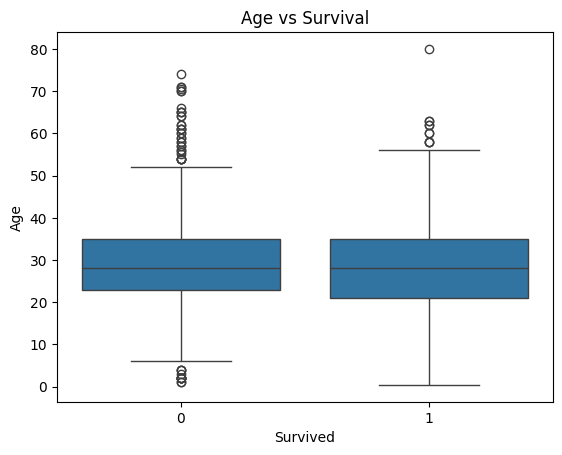

In [10]:
sns.boxplot(x='Survived', y='Age', data=train_data)
plt.title('Age vs Survival')
plt.show()


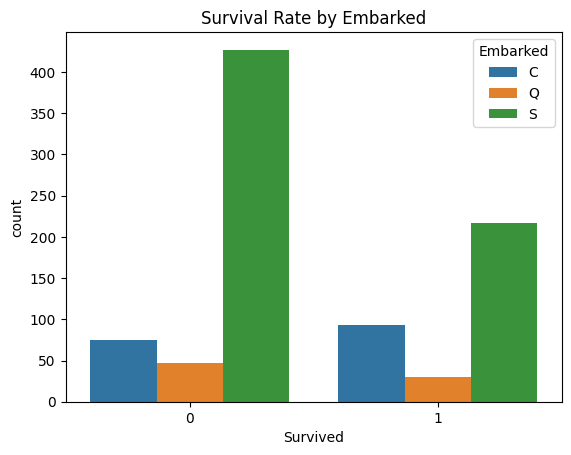

In [11]:
sns.countplot(x='Survived', hue='Embarked', data=train_data)
plt.title('Survival Rate by Embarked')
plt.show()


In [12]:
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1
train_data['IsAlone'] = 1
train_data.loc[train_data['FamilySize'] > 1, 'IsAlone'] = 0


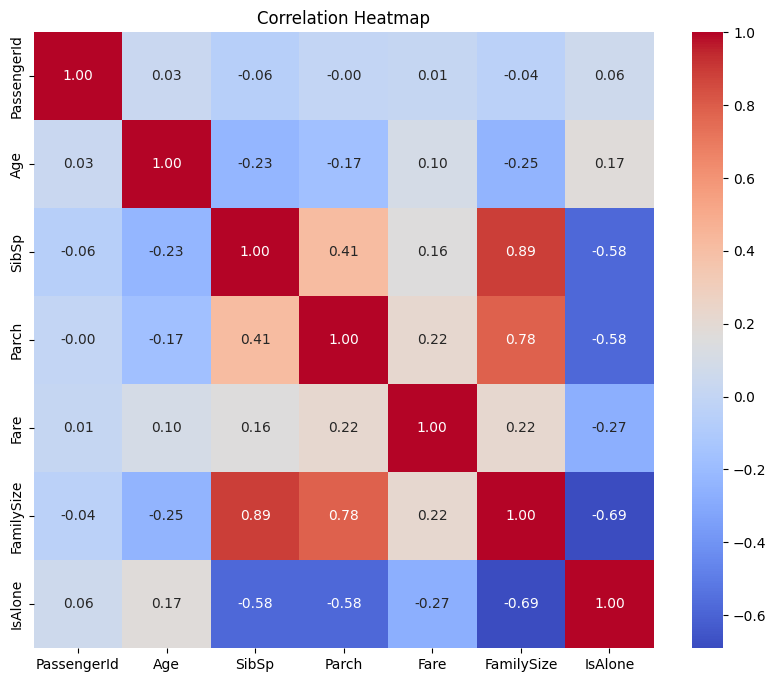

In [14]:
numeric_data = train_data.select_dtypes(include=['number'])
corr = numeric_data.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
x = train_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'FamilySize', 'IsAlone']]
x = pd.get_dummies(x, drop_first=True)
y = train_data['Survived']

model = RandomForestClassifier(n_estimators=100)
model.fit(x, y)
